In [21]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week4/Analysis/')

## Gmx commands used after simulation

Use gmx trjcat to concatenate the trajectories:

`gmx_mpi trjcat -f step5_1.xtc step5_2.xtc step5_3.xtc step5_4.xtc step5_5.xtc step5_6.xtc step5_7.xtc step5_8.xtc step5_9.xtc -o concat_traj.xtc -settime`

- `-settime` can be used to change the start time for each file. Use `c` to concatenate the time of each file continuously.

Use gmx trjconv to warp the protein and remove the solvent:

`gmx_mpi trjconv -s step5_9.tpr -f concat_traj.xtc -center -ur compact -pbc mol -o concat_center_noSolvent.xtc`

Use gmx trjconv to generate the gro file with no solvent:

`gmx_mpi trjconv -s step5_9.tpr -f step5_9.gro -center -ur compact -pbc mol -o structure_noSolvent.gro`

## Trajectory analysis

In [31]:
# read in the trajectory
traj = md.load_xtc('../Setup/2JOF_AMBER/gromacs/concat_center_noSolvent.xtc', top='../Setup/2JOF_AMBER/gromacs/structure_noSolvent.gro')
print('total traj time (ns): ', traj.time.max()/1000)

total traj time (ns):  90.0


Though the assignment instruction says there should be 100 ns in total, the while loop in run_setup.bash: 

`cnt=1`

`cntmax=10`

`while [ ${cnt} -lt ${cntmax} ]`

assigns only 9 times of iteration. As a result, the total time is 90 ns.

In [24]:
# calculate end-to-end distance
last_idx = traj.xyz.shape[1] - 1
end_end_dist = md.compute_distances(traj, [[0, last_idx]], periodic=False).reshape(-1)

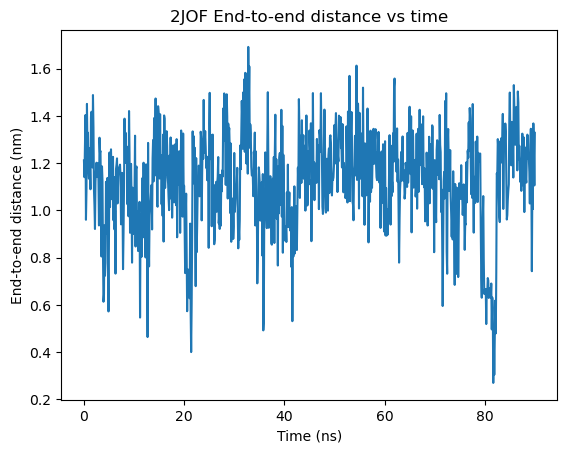

In [32]:
# plot the end-end distance vs time
plt.plot(traj.time / 1000, end_end_dist)
plt.xlabel('Time (ns)')
plt.ylabel('End-to-end distance (nm)')
plt.title('2JOF End-to-end distance vs time')
plt.savefig('../Figures/2JOF_end_end_dist.pdf', bbox_inches="tight")
plt.show()

In [33]:
# calculate the radius of gyration
rg = md.compute_rg(traj)

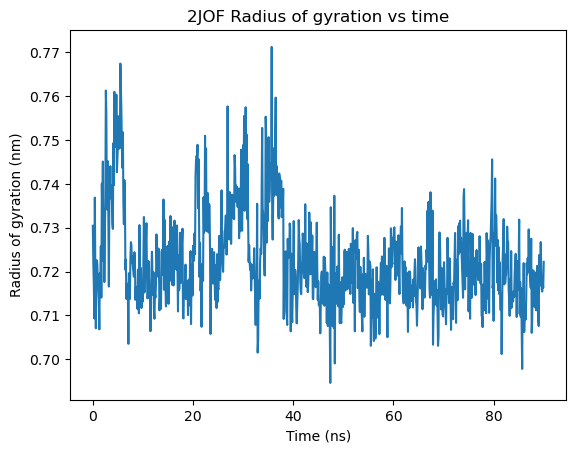

In [34]:
# plot the radius of gyration vs time
plt.plot(traj.time / 1000, rg)
plt.xlabel('Time (ns)')
plt.ylabel('Radius of gyration (nm)')
plt.title('2JOF Radius of gyration vs time')
plt.savefig('../Figures/2JOF_rg.pdf', bbox_inches="tight")
plt.show()